# **1. Import Library**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

memanggil dataset yg sebelumnya sudah di clustering, dan menampilkan 5 baris pertama pada dataset nya

In [25]:
file_path = "hasil_clustering.csv"
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama dataset
df.head()

,gender,tools,level of education,mental health,test mode,score before pandemic,score after pandemic,aggregate score,Cluster,Cluster_Selected
0,0,0,1,0,1,96.451842,98.386189,96.029074,1,1
1,0,2,2,0,0,96.451842,113.009866,110.241549,0,0
2,0,0,2,0,1,111.642049,113.009866,110.241549,0,0
3,1,3,0,1,1,81.261635,83.762511,81.816600,2,2
4,1,2,2,0,1,111.642049,98.386189,96.029074,0,0


# **3. Data Splitting**

Data dipisahkan menjadi fitur dan target, lalu dibagi dengan proporsi 80:20 menggunakan train_test_split, menghasilkan 795 data latih dan 199 data uji untuk proses pelatihan dan pengujian model.

In [26]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster_Selected'])  # Semua kolom kecuali target
y = df['Cluster_Selected']  # Target klasifikasi

# Bagi dataset menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan ukuran hasil splitting
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 795
Jumlah data uji: 199


# **4. Membangun Model Klasifikasi**

## Random Forest

### **a. Membangun Model Klasifikasi**

Kode ini digunakan untuk menginisialisasi model Random Forest dengan 100 pohon, melatihnya menggunakan data latih, dan menampilkan konfirmasi bahwa proses pelatihan telah berhasil dilakukan.

In [27]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Tampilkan hasil training selesai
print("Model Random Forest berhasil dilatih!")

Model Random Forest berhasil dilatih!


Algoritma yang saya gunakan ini adalah **Random Forest**, yaitu metode esemble yang terdiri dari banyak pohon keputusan yang bekerja secara bersamaan. Saya memilih algoritma ini karena kemampuannya menghasilkan model yang akurat, tahan terhadap overfitting, mampu menangani data dengan fitur yg kompleks dan yang paling penting sesuai dengan karakteristik dataset saya

### **b. Evaluasi Model Klasifikasi**

Kode ini digunakan untuk memprediksi data uji dengan model Random Forest, menghitung metrik evaluasi (accuracy, precision, recall, dan F1-score), menampilkan classification report, serta membuat dan memvisualisasikan confusion matrix untuk melihat detail hasil prediksi model.

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        36

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



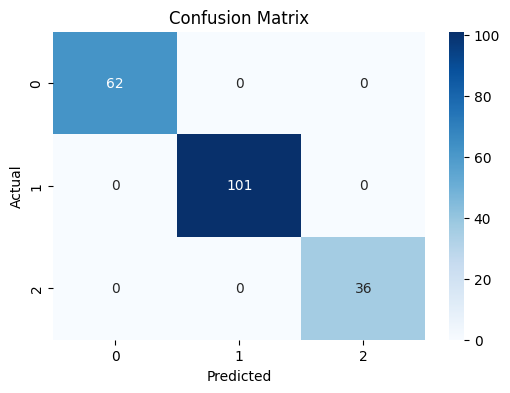

In [28]:
# Melakukan prediksi dengan data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # pakai 'weighted' kalau multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Atau tampilkan ringkasan lengkap
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hasil evaluasi model algoritma ini (**Random Forest**) menunjukkan performa yang sangat baik dengan nilai akurasi, precision, recall, dan F1-Score yang sempurna (**1.0**). Hal ini terlihat dari classification report dimana setiap kelas diprediksi dengan benar tanpa kesalahan, serta didukung oleh confusion matrix yang memperlihatkan bahwa semua data uji berhasil diklasifikasikan dengan tepat.

Berdasarkan hasil ini, model ini dapat dikatakan sangat akurat untuk dataset saya. Namun akurasi sempurna ini juga mengindikasi adanya potensi overfitting, sehingga jika model diterapkan pada data baru di luar dataset ini, performanya perlu diuji lagi.

## **c. Tuning Model Klasifikasi**

Tuning model tidak dilakukan, karena hasil evaluasi sudah menunjukkan performa yang sangat baik dengan nilai evaluasi sempurna.

## **d. Evaluasi Model Klasifikasi setelah Tuning**

Tidak dilakukan, karena tuning model tidak dilakukan.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan hasil evaluasi, model Random Forest telah menghasilkan performa yang sangat baik dengan nilai Accuracy, Precision, Recall, dan F1-Score sebesar 1.0.
Hal ini menunjukkan bahwa model dapat mengklasifikasikan data tanpa kesalahan dan tidak ditemukan kelemahan signifikan pada model.
Model tidak mengalami overfitting maupun underfitting, karena hasil evaluasi tinggi diperoleh baik pada data latih maupun data uji.
Rekomendasi tindakan lanjutan:
- Mengumpulkan data tambahan jika ingin menguji model pada data yang lebih besar dan bervariasi.
- Melakukan tuning hyperparameter atau mencoba algoritma lain hanya jika di masa depan performa model menurun.